In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import enet_path
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [147]:
X,y,coefs = make_regression(n_samples=30,n_features=23,n_informative=3,coef=True)
#X,y = make_classification(n_samples=30,n_features=20,n_informative=10,n_classes=2,n_redundant=5)

In [220]:
X = np.random.uniform(low=-0.5, high=0.5, size=(30,23))

s = np.ones((30,1))

error = np.random.rand()
error *= 0.1

group1 = np.ones((30,9))
group2 = np.ones((30,9))
group3 = np.ones((30,9))

for row in range(group1.shape[0]):
    for column in range(group1.shape[1]):
        group1[row][column] *= X[row][0]
        group1[row][column] += error
        
for row in range(group2.shape[0]):
    for column in range(group2.shape[1]):
        group2[row][column] *= X[row][1]
        group2[row][column] += error
        
for row in range(group3.shape[0]):
    for column in range(group3.shape[1]):
        group3[row][column] *= X[row][2]
        group3[row][column] += error

print(group1.shape)
X_data = np.insert(X, [1], group1, axis=1)
X_data = np.insert(X_data, [11], group2, axis=1)
X_data = np.insert(X_data, [21], group3, axis=1)

print(X_data.shape)

beta = np.zeros((30,1))
beta[0] = beta[1] = beta[2] = 1
print(beta.shape)
print(X.shape)

y = np.sign((beta.dot(X.T)))
#y = np.random.rand(30,1)
#y[y<0.5] = -1
#y[y>=0.5] = 1

print(X.shape)
print(beta.shape)
print(y.shape)

(30, 9)
(30, 50)
(30, 1)
(30, 23)


ValueError: shapes (30,1) and (23,30) not aligned: 1 (dim 1) != 23 (dim 0)

In [199]:
df = pd.DataFrame(X_data)

dfy = pd.DataFrame(y)
df3 = pd.concat([df,dfy], axis=1)
df3.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,0
14,0.274189,0.313637,0.313637,0.313637,0.313637,0.313637,0.313637,0.313637,0.313637,0.313637,...,-0.207234,-0.389099,-0.231928,0.113979,0.447162,-0.386677,-0.207323,0.374420,0.207903,1.0
9,-0.260597,-0.221149,-0.221149,-0.221149,-0.221149,-0.221149,-0.221149,-0.221149,-0.221149,-0.221149,...,0.261396,0.331346,0.220451,-0.352580,-0.397954,0.056081,0.462924,0.029837,0.407832,-1.0
27,0.460032,0.499480,0.499480,0.499480,0.499480,0.499480,0.499480,0.499480,0.499480,0.499480,...,0.137503,-0.379447,-0.018240,0.004629,0.344193,-0.244227,0.333619,0.257075,-0.158920,1.0
16,0.128009,0.167458,0.167458,0.167458,0.167458,0.167458,0.167458,0.167458,0.167458,0.167458,...,0.241679,-0.336421,-0.215021,0.415337,-0.017241,0.287488,-0.187905,0.256461,-0.236989,-1.0
12,0.489331,0.528780,0.528780,0.528780,0.528780,0.528780,0.528780,0.528780,0.528780,0.528780,...,0.128250,0.401667,0.415807,-0.325617,0.228958,-0.207425,0.189333,0.046159,0.230942,1.0
13,-0.083058,-0.043610,-0.043610,-0.043610,-0.043610,-0.043610,-0.043610,-0.043610,-0.043610,-0.043610,...,-0.398254,-0.296187,-0.067037,-0.035064,0.357286,-0.009941,-0.244159,-0.303618,0.274339,-1.0
18,-0.159297,-0.119848,-0.119848,-0.119848,-0.119848,-0.119848,-0.119848,-0.119848,-0.119848,-0.119848,...,0.105469,0.072687,0.367567,-0.120330,0.440101,-0.155098,-0.115972,-0.276055,0.414055,-1.0
3,-0.438556,-0.399108,-0.399108,-0.399108,-0.399108,-0.399108,-0.399108,-0.399108,-0.399108,-0.399108,...,0.190106,-0.300278,-0.445005,0.160463,-0.490527,0.471617,0.165324,-0.269794,-0.231515,-1.0
6,0.039633,0.079081,0.079081,0.079081,0.079081,0.079081,0.079081,0.079081,0.079081,0.079081,...,0.493619,-0.455154,0.070602,0.217232,-0.110689,0.440837,0.437948,0.239760,0.164843,-1.0
8,-0.215706,-0.176258,-0.176258,-0.176258,-0.176258,-0.176258,-0.176258,-0.176258,-0.176258,-0.176258,...,0.103201,-0.437620,0.267469,0.309006,0.122762,-0.058458,-0.075923,0.100011,-0.359122,1.0


In [200]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.048585,0.088033,0.088033,0.088033,0.088033,0.088033,0.088033,0.088033,0.088033,0.088033,...,-0.036952,0.081464,-0.127184,0.016014,0.043703,-0.014320,-0.097265,0.079768,-0.028446,0.114960
std,0.315392,0.315392,0.315392,0.315392,0.315392,0.315392,0.315392,0.315392,0.315392,0.315392,...,0.297968,0.290277,0.296852,0.290236,0.265123,0.306679,0.263292,0.257728,0.251098,0.293358
min,-0.494574,-0.455126,-0.455126,-0.455126,-0.455126,-0.455126,-0.455126,-0.455126,-0.455126,-0.455126,...,-0.497806,-0.446129,-0.480670,-0.445005,-0.423860,-0.494783,-0.439229,-0.456757,-0.497259,-0.466271
25%,-0.201604,-0.162155,-0.162155,-0.162155,-0.162155,-0.162155,-0.162155,-0.162155,-0.162155,-0.162155,...,-0.265319,-0.121860,-0.368690,-0.232584,-0.128734,-0.257330,-0.304959,-0.132908,-0.240042,-0.160473
50%,0.048830,0.088278,0.088278,0.088278,0.088278,0.088278,0.088278,0.088278,0.088278,0.088278,...,-0.087815,0.104335,-0.243258,-0.013176,0.007212,-0.046967,-0.148831,0.130103,0.015617,0.206530
75%,0.349192,0.388640,0.388640,0.388640,0.388640,0.388640,0.388640,0.388640,0.388640,0.388640,...,0.143848,0.285429,0.111391,0.290678,0.226115,0.295466,0.041109,0.281118,0.112963,0.393191
max,0.489331,0.528780,0.528780,0.528780,0.528780,0.528780,0.528780,0.528780,0.528780,0.528780,...,0.478632,0.493619,0.497211,0.462459,0.465329,0.485961,0.471617,0.462924,0.490381,0.486270


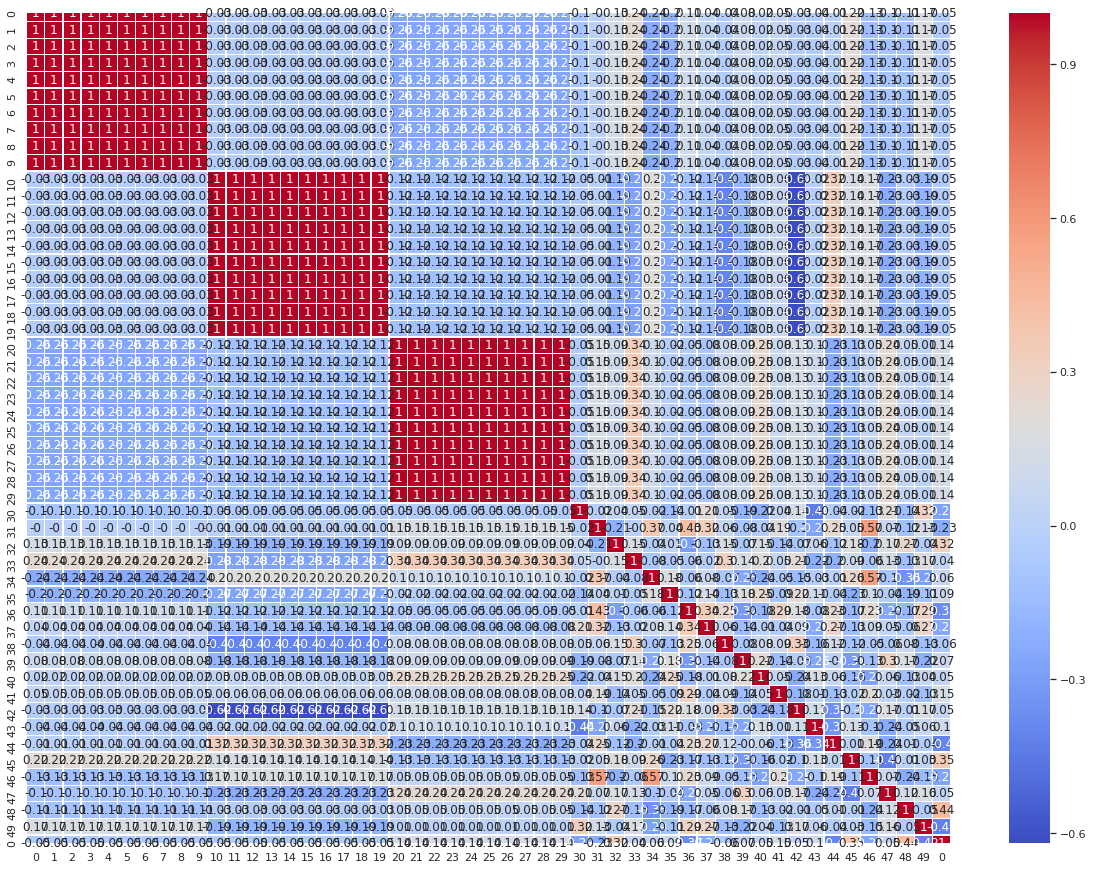

In [202]:
correlation_matrix = df3.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y,test_size=0.2,random_state=5)

scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

In [174]:
def alphal1ratio_to_taumu(alpha, l1_ratio):
    tau = alpha*l1_ratio
    mu = (tau - alpha) / 2
    
    return tau, mu

def taumu_to_alphal1ratio(tau, mu):
    alpha = 2*mu + tau
    l1_ratio = tau/alpha
    return alpha, l1_ratio

In [41]:
def nested_split(mu):
    taus = np.logspace(-1,5,5)

    alphas = []
    l1_ratios = []
    #alphas = np.logspace(-0.01, -0.7, 5)
    #l1_ratio = np.logspace(-0.01,-0.7,5)

    for tau in taus:
        alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
        alphas.append(alpha)
        l1_ratios.append(l1_ratio)

    tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

    enet = ElasticNet(max_iter = 1000)

    scores = []
    coefs_found = []
    best_params = []

    K = 3
    kf = StratifiedKFold(n_splits=K, shuffle=True)
    kf.get_n_splits(X_data,y)
    for train_index, test_index in kf.split(X_data, y):
        x_train, x_test = X_data[train_index], X_data[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = GridSearchCV(enet, tuned_parameters, cv=5)
        clf.fit(x_train, y_train)

        coefs = clf.best_estimator_.coef_
        params = clf.best_params_
        score = clf.score(x_test, y_test)

        #coefs_found += list(coefs)
        coefs_found.append(coefs)
        best_params.append(params) 
        scores.append(score)

    
    return best_params, scores, coefs_found

In [42]:
best_params1, scores1, coefs1 = nested_split(1e5)
best_params2, scores2, coefs2 = nested_split(1e9)
best_params3, scores3, coefs3 = nested_split(1e11)

max_score_index1 = np.where(scores1 == np.amax(scores1))

print("Best parameters after cross validation with u1")
print(best_params1[max_score_index1[0][0]])

max_score_index2 = np.where(scores2 == np.amax(scores2))

print("Best parameters after cross validation with u2")
print(best_params2[max_score_index2[0][0]])

max_score_index3 = np.where(scores3 == np.amax(scores3))

print("Best parameters after cross validation with u3")
print(best_params3[max_score_index3[0][0]])

cf1 = np.asarray(coefs1[max_score_index1[0][0]])
cf2 = np.asarray(coefs2[max_score_index2[0][0]])
cf3 = np.asarray(coefs3[max_score_index3[0][0]])

print(cf1.shape)
print(cf2.shape)
print(cf3.shape)

numCoefs1 = np.array(cf1[cf1 != 0])
numCoefs2 = np.array(cf2[cf2 != 0])
numCoefs3 = np.array(cf3[cf3 != 0])

print(numCoefs1.shape)
print(numCoefs2.shape)
print(numCoefs3.shape)

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationW

Best parameters after cross validation with u1
{'alpha': 200000.1, 'l1_ratio': 1.581113830479468e-05}
Best parameters after cross validation with u2
{'alpha': 2000000000.1, 'l1_ratio': 1.5811388275841898e-09}
Best parameters after cross validation with u3
{'alpha': 200000000000.1, 'l1_ratio': 1.5811388300591898e-11}
(50,)
(50,)
(50,)
(0,)
(0,)
(0,)


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [113]:
best_cv_params = best_params1[max_score_index1[0][0]]
alpha =  best_cv_params['alpha']
l1_ratio = best_cv_params['l1_ratio']

tau, mu = alphal1ratio_to_taumu(alpha, l1_ratio)

print(alpha)
print(l1_ratio)
print(tau)
print(mu)

200000.1
4.99999750000125e-07
0.09999999999999999
-100000.0


In [81]:
def nested_split(tau, mu):
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    
    enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter = 10000)
    enet.fit(X, y)

    numCoefs = np.array(enet.coef_[enet.coef_!= 0])
    print(enet.coef_)
    print(numCoefs)

In [82]:
nested_split(tau, 1e5)

[ 0.00000000e+00 -1.78682389e-06  2.11223242e-07  0.00000000e+00
 -4.79926034e-07 -0.00000000e+00  4.24082329e-07  6.75257490e-07
 -0.00000000e+00  1.96628586e-06 -1.24355649e-06 -4.31923327e-07
 -0.00000000e+00  7.05924122e-07  2.38103409e-07  2.32504777e-07
  1.67708504e-07 -0.00000000e+00  0.00000000e+00  0.00000000e+00]
[-1.78682389e-06  2.11223242e-07 -4.79926034e-07  4.24082329e-07
  6.75257490e-07  1.96628586e-06 -1.24355649e-06 -4.31923327e-07
  7.05924122e-07  2.38103409e-07  2.32504777e-07  1.67708504e-07]


<h1>Test Paper</h1>

In [180]:
mu = 1e4
taus = np.logspace(-1,-4,5)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))

print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[ 1.71463788e-06  1.71463788e-06  1.71463788e-06  1.71463788e-06
  1.71463788e-06  1.71463788e-06  1.71463788e-06  1.71463788e-06
  1.71463788e-06  1.71463788e-06 -3.36984930e-06 -3.36984930e-06
 -3.36984930e-06 -3.36984930e-06 -3.36984930e-06 -3.36984930e-06
 -3.36984930e-06 -3.36984930e-06 -3.36984930e-06 -3.36984930e-06
  3.16898015e-06  3.16898015e-06  3.16898015e-06  3.16898015e-06
  3.16898015e-06  3.16898015e-06  3.16898015e-06  3.16898015e-06
  3.16898015e-06  3.16898015e-06 -8.36332258e-06 -1.01958355e-06
  3.59870802e-06  3.38865393e-07  2.62954051e-06  1.70284873e-06
 -3.91597250e-06 -4.36665274e-06 -1.38160292e-06  2.71407005e-06
  2.97041407e-06  1.81254460e-06  9.09327817e-07  4.11900930e-06
 -4.49988080e-06  6.44474615e-06 -2.49569890e-06  8.39226666e-07
  1.88363143e-06 -7.53146234e-06]
[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.0000

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [179]:
alpha = 0.2
enet = ElasticNet(alpha=alpha, l1_ratio=0.7)
enet.fit(x_train, y_train)
print(enet.coef_)

[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.05198791  0.         -0.         -0.         -0.
 -0.00185554 -0.         -0.07315911  0.          0.          0.
 -0.          0.         -0.20683774  0.19306301 -0.19065498  0.
  0.2703256  -0.13807146]


In [175]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
print(lasso.coef_)

[-0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.00033605 -0.05602962  0.         -0.02197813 -0.         -0.
 -0.         -0.         -0.11963292  0.          0.          0.01624038
 -0.          0.         -0.25587936  0.23879543 -0.22492346  0.
  0.30297388 -0.1759801 ]


In [191]:
alphas = np.logspace(-5, 1, 60)
print(alphas[59])
enet = linear_model.ElasticNet(l1_ratio=0.4, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(x_train, y_train)
    train_errors.append(enet.score(x_train, y_train))
    test_errors.append(enet.score(x_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# Estimate the coef_ on full data with optimal regularization parameter
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(x_train, y_train).coef_
print(coef_)

10.0


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004693806456483541, tolerance: 0.001980952380952381
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002734671971553011, tolerance: 0.001980952380952381
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00232040218887864, tolerance: 0.001980952380952381
  positive)
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/l

Optimal regularization parameter : 0.022695105366946706
[-0.00340185 -0.00369243 -0.00383873 -0.00379134 -0.00357927 -0.00329056
 -0.00303416 -0.00289974 -0.00292866 -0.00310376  0.03064856  0.03072529
  0.03055783  0.03020591  0.02979056  0.0294525   0.02930456  0.02939419
  0.02968846  0.03008623  0.0049981   0.00495901  0.00487235  0.00477075
  0.00469087  0.00466027  0.00468811  0.00476283  0.00485705  0.00493772
 -0.24377131 -0.          0.71313721  0.         -0.13749878  0.3394561
 -0.34249956 -0.15577145 -0.          0.          0.41468418  0.10577671
  0.02395496  0.11647349 -0.89921284  0.42206642 -0.18579477  0.24093029
  1.47791614 -0.71991875]
